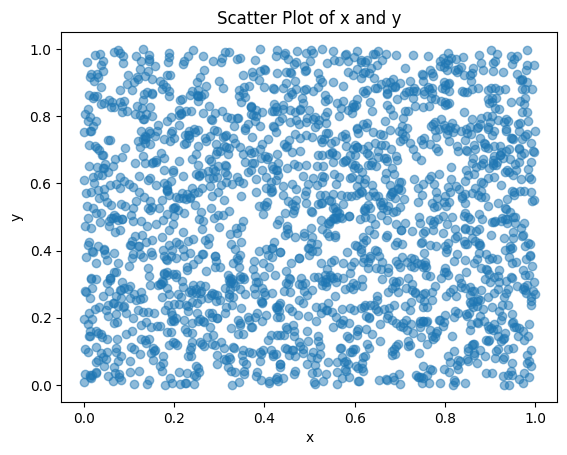

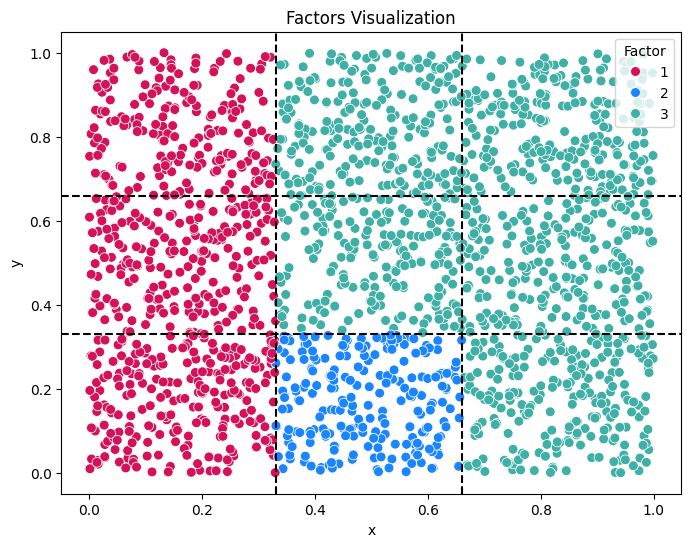

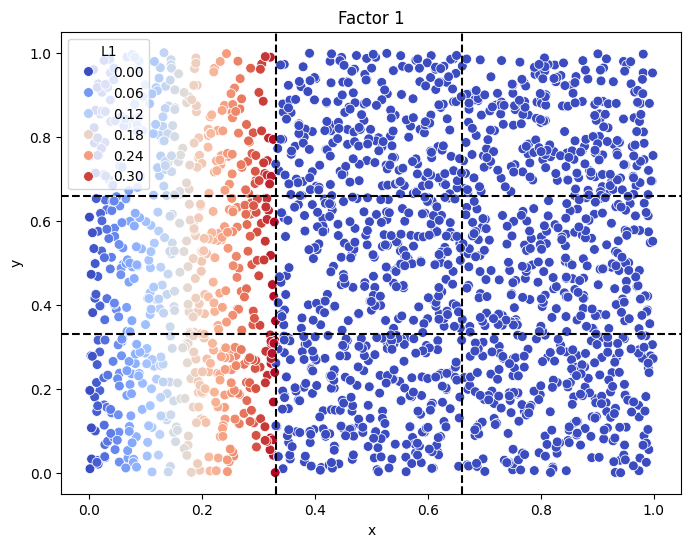

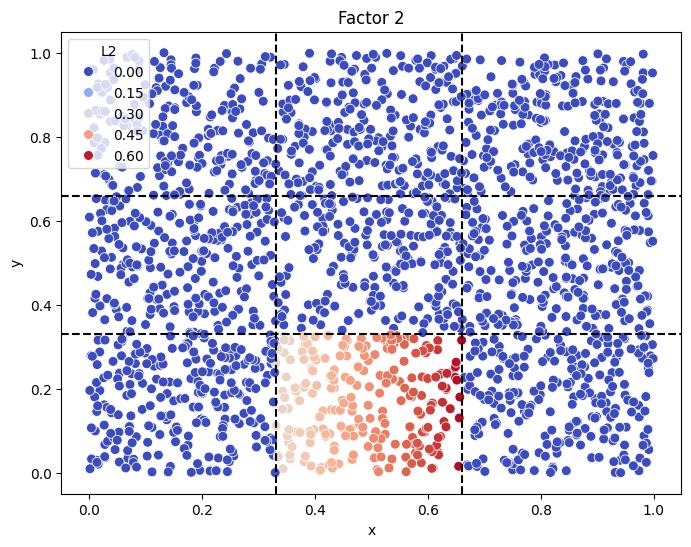

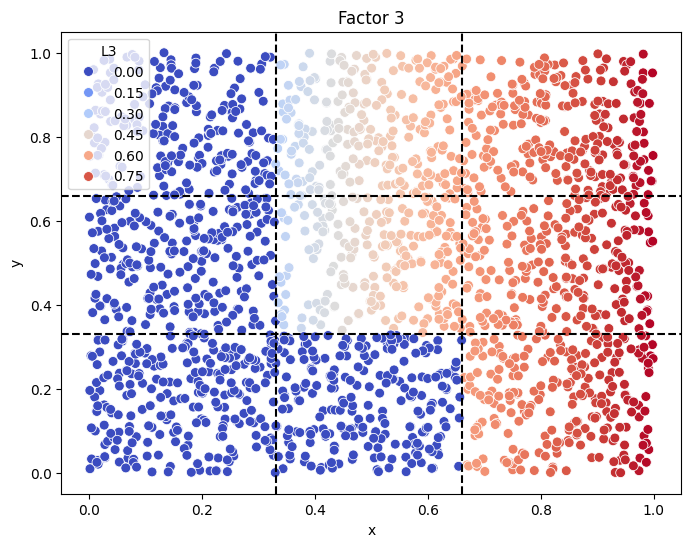

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(1)

# Generate random uniform data
x = np.random.uniform(size=2000)
y = np.random.uniform(size=2000)
X = np.column_stack((x, y))

# Plot the scatter plot of x and y
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y")
plt.show()

# Generate matrix f
f = np.empty((3, 200))
for i in range(f.shape[1]):
    t1 = np.random.choice([0, 1], size=1)[0]
    t2 = np.random.choice([0, 1], size=1)[0]
    f[0, i] = t1 * np.random.randn()
    f[1, i] = t2 * np.random.randn()
    f[2, i] = t2 * np.random.randn()

# Initialize matrix L and factor array
L = np.empty((len(x), 3))
factor = []

# Populate L and factor arrays
for i in range(len(x)):
    if (x[i] < 0.33  )  :
        L[i, :] = [np.sin  (x[i]), 0, 0]
        factor.append(1)
    elif   (0.33 < x[i] < 0.66 and y[i] < 0.33) :
        L[i, :] = [0, np.sin  (x[i]), 0]
        factor.append(2)
    else:
        L[i, :] = [0, 0,np.sin  (x[i])]
        factor.append(3)

# Convert to DataFrame
df = pd.DataFrame({"x": x, "y": y, "Factor": factor})

# Colors for the plot
colors = ["#D41159", "#1A85FF", "#40B0A6"]

# Plot factor visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette=colors, s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()

# Create individual factor plots
for i in range(3):
    df[f"L{i+1}"] = L[:, i]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x="x",
        y="y",
        hue=f"L{i+1}",
        palette="coolwarm",
        s=50
    )
    plt.axhline(0.33, color="black", linestyle="--")
    plt.axhline(0.66, color="black", linestyle="--")
    plt.axvline(0.33, color="black", linestyle="--")
    plt.axvline(0.66, color="black", linestyle="--")
    plt.title(f"Factor {i+1}") 
    plt.show()

# Generate Z matrix
Z = L @ f + np.random.randn(L.shape[0], f.shape[1])  *2.5


In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
ebmf= cEBMF(data= np.array(Z),
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace", K=10)

In [4]:
ebmf.init_LF()
for i in range(50):
    ebmf.iter()

The array does not contain any missing values.


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:294: RuntimeWarning: overflow encountered in exp
  w = 1 - 1 / (1 + np.exp(p[0]))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\pyth

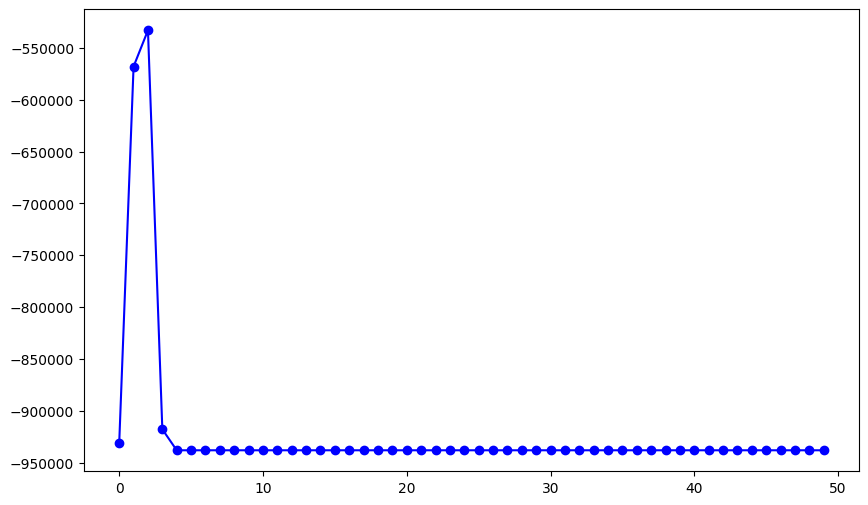

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(ebmf.obj)[1:], marker='o', linestyle='-', color='b')

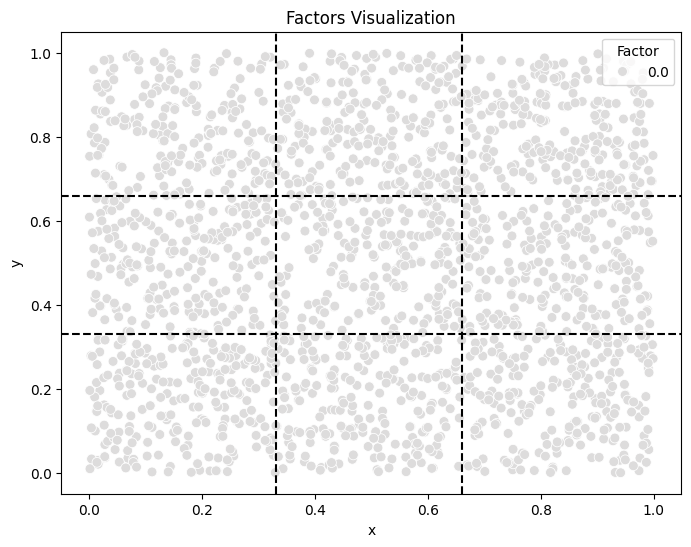

In [18]:

df = pd.DataFrame({"x": x, "y": y, "Factor":ebmf.L[:,2]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


In [7]:
mycebmf_cgb= cEBMF(data= np.array(Z), K=5,
               prior_L= "cgb", 
                 prior_F= "point_Laplace",
               X_l=X )
mycebmf_cgb.init_LF()
for i in range(7):
    mycebmf_cgb.iter()

The array does not contain any missing values.
Epoch 0, Loss: 0.9983083009719849, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6688027381896973, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6959538459777832, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6679484844207764, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6786071062088013, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.12947897613048553, Sigma_2^2: 0.014177247881889343
Epoch 0, Loss: -0.9553428292274475, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.6843104362487793, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.37627434730529785, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.2056780755519867, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.17854955792427063, Sigma_2^2: 0.007517063990235329
Epoch 0, Loss: -1.0424044132232666, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.6290637254714966, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.07932364195585251, Sigma_2^2: 9.99999997475

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a 

Epoch 0, Loss: 10.12901496887207, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: divide by zero encountered in scalar divide
  dgrigh

Epoch 0, Loss: -0.17900113761425018, Sigma_2^2: 0.007135459687560797
Epoch 0, Loss: -1.0412510633468628, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5988321900367737, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a 

Epoch 0, Loss: -0.18283647298812866, Sigma_2^2: 0.0066179740242660046
Epoch 0, Loss: -1.010145664215088, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5547945499420166, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.129027366638184, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)


Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: divide by zero encountered in scalar divide
  dgrigh

Epoch 0, Loss: -0.18476223945617676, Sigma_2^2: 0.005913534201681614
Epoch 0, Loss: -0.9681655764579773, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5097812414169312, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -2.471740484237671, Sigma_2^2: 0.002097431104630232
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.18626640737056732, Sigma_2^2: 0.006188604049384594
Epoch 0, Loss: -0.9341171979904175, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.48919838666915894, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -4.467914581298828, Sigma_2^2: 0.005873652640730143
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


In [8]:
mycebmf= mycebmf_cgb

In [9]:
mycebmf= cEBMF(data= np.array(Z), K=3,
               prior_L= "emdn",
               X_l=X )
mycebmf.init_LF()
for i in range(7):
    mycebmf.iter()

The array does not contain any missing values.
Epoch 10/50, Loss: 1.0656
Epoch 20/50, Loss: 0.8426
Epoch 30/50, Loss: 0.8059
Epoch 40/50, Loss: 0.8021
Epoch 50/50, Loss: 0.7985
Epoch 10/50, Loss: 0.9462
Epoch 20/50, Loss: 0.6776
Epoch 30/50, Loss: 0.6764
Epoch 40/50, Loss: 0.6760
Epoch 50/50, Loss: 0.6761
Epoch 10/50, Loss: 0.9978
Epoch 20/50, Loss: 0.7058
Epoch 30/50, Loss: 0.7021
Epoch 40/50, Loss: 0.7027
Epoch 50/50, Loss: 0.7020
Epoch 10/50, Loss: 0.2558
Epoch 20/50, Loss: 0.2219
Epoch 30/50, Loss: 0.2082
Epoch 40/50, Loss: 0.2032
Epoch 50/50, Loss: 0.1995
Epoch 10/50, Loss: -1.2962
Epoch 20/50, Loss: -1.4973
Epoch 30/50, Loss: -1.5248
Epoch 40/50, Loss: -1.5332
Epoch 50/50, Loss: -1.5391
Epoch 10/50, Loss: -0.7207
Epoch 20/50, Loss: -0.8015
Epoch 30/50, Loss: -0.8100
Epoch 40/50, Loss: -0.8130
Epoch 50/50, Loss: -0.8137
Epoch 10/50, Loss: 0.2097
Epoch 20/50, Loss: 0.2051
Epoch 30/50, Loss: 0.2014
Epoch 40/50, Loss: 0.1986
Epoch 50/50, Loss: 0.1962
Epoch 10/50, Loss: -1.5976
Epoch 

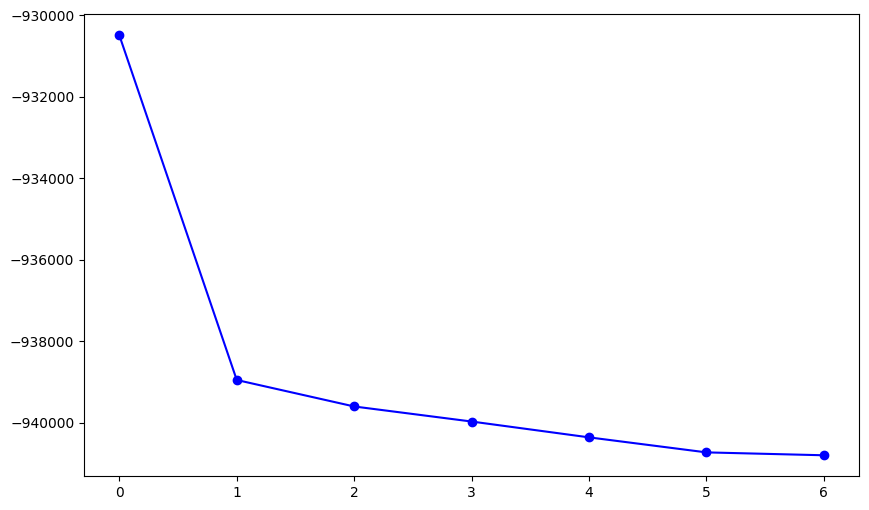

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

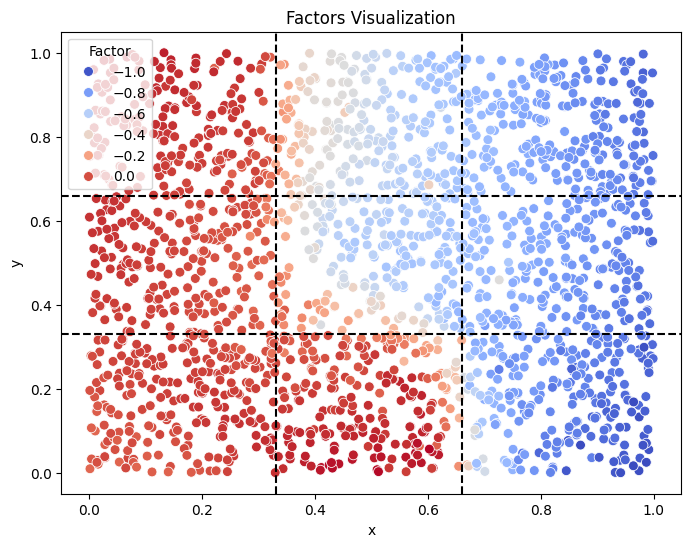

In [11]:

df = pd.DataFrame({"x": x, "y": y, "Factor":mycebmf.L[:,0]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


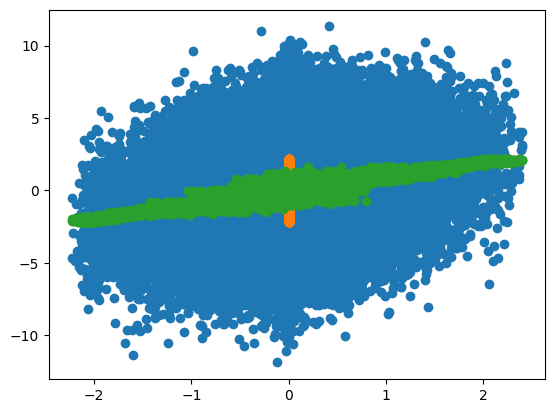

In [19]:
plt.scatter(mycebmf.Y_fit, Z)
 

plt.scatter(ebmf.Y_fit,L @ f )  

plt.scatter(mycebmf.Y_fit,L @ f )  

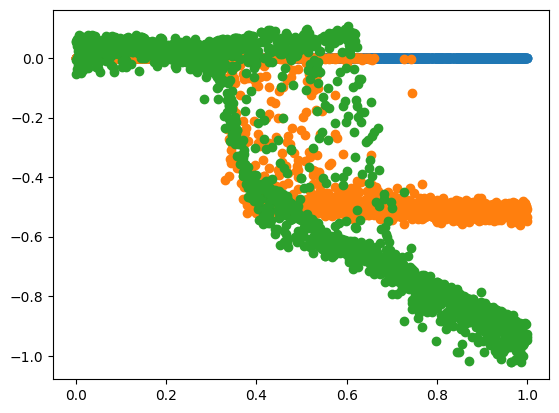

In [21]:

plt.scatter(x, ebmf.L[:,1]) 

plt.scatter(x,mycebmf_cgb.L[:,0]) 
plt.scatter(x,mycebmf.L[:,0]) 

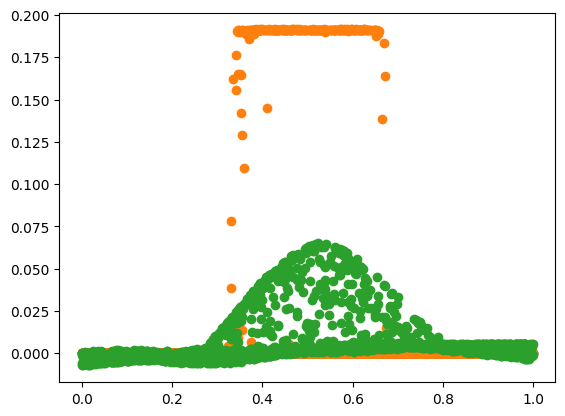

In [22]:

plt.scatter(x, ebmf.L[:,1]) 
plt.scatter(x,mycebmf_cgb.L[:,1]) 
plt.scatter(x,mycebmf.L[:,1]) 

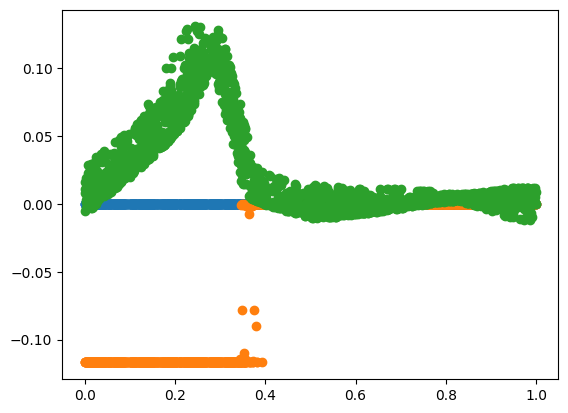

In [23]:
plt.scatter(x, ebmf.L[:,2])
plt.scatter(x,mycebmf_cgb.L[:,2])  
plt.scatter(x,mycebmf.L[:,2]) 